# Import

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 

from adtk.data import validate_series
from adtk.detector import *

from adtk_modif.src.adtk.visualization import plot  

# Get Data

In [14]:
data = pd.read_csv('data/monthly_csv.csv') # Temperature data
data.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data['Mean']
data.head()

Date
2016-12-06    0.7895
2016-12-06    0.8100
2016-11-06    0.7504
2016-11-06    0.9300
2016-10-06    0.7292
Name: Mean, dtype: float64

In [16]:
data.describe()

count    3288.000000
mean        0.036588
std         0.335255
min        -0.780000
25%        -0.208150
50%        -0.036600
75%         0.240000
max         1.350000
Name: Mean, dtype: float64

Adjusting threshold

In [25]:
threshol_detector = ThresholdAD(low=-0.5, high=0.75)

anomalies = threshol_detector.detect(data)

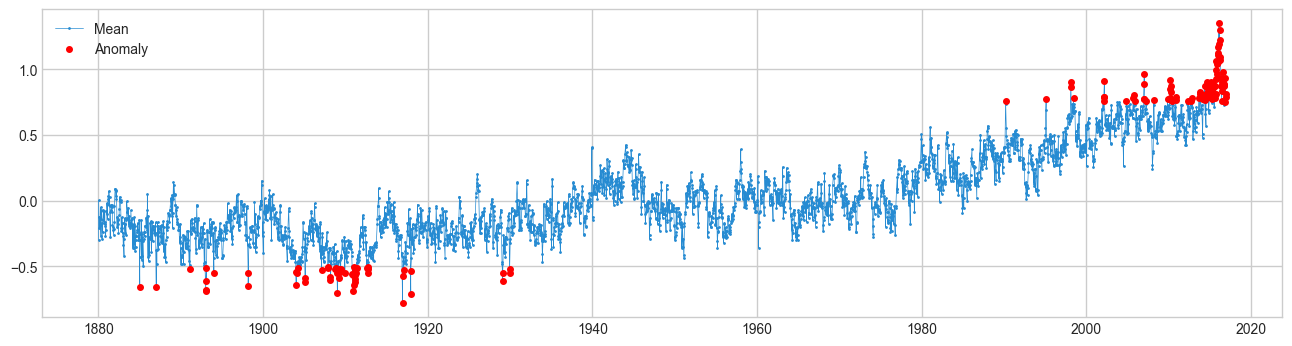

In [23]:
plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

I encountered an issue with the **seaborn-whitegrid** style in the **adtk** package. To address this, I downloaded the entire package to my local environment and made necessary code modifications. Already submitted a pull request to the adtk team, but the changes have not been incorporated yet. If you are experiencing a similar problem, you can follow the same approach to resolve the issue.

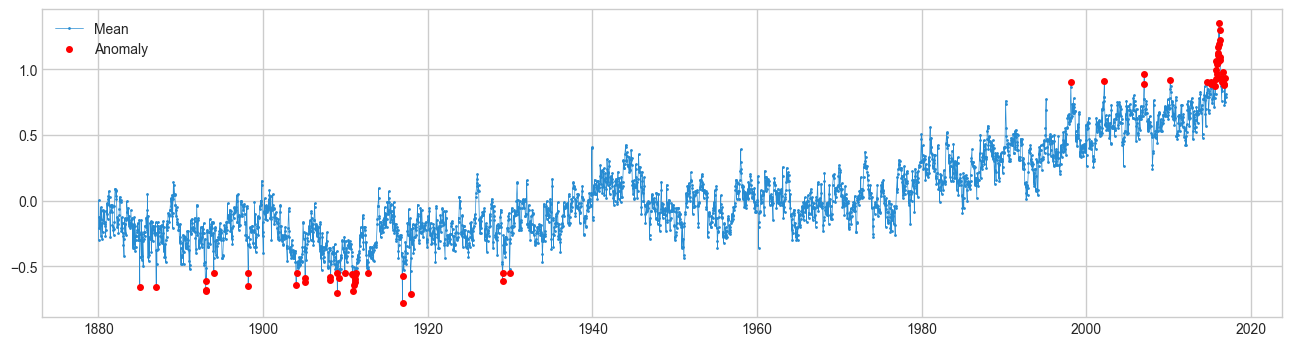

In [28]:
# Instead of adjusting threshold we can also use quantiles 

quantile_detector = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_detector.fit_detect(data)

plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

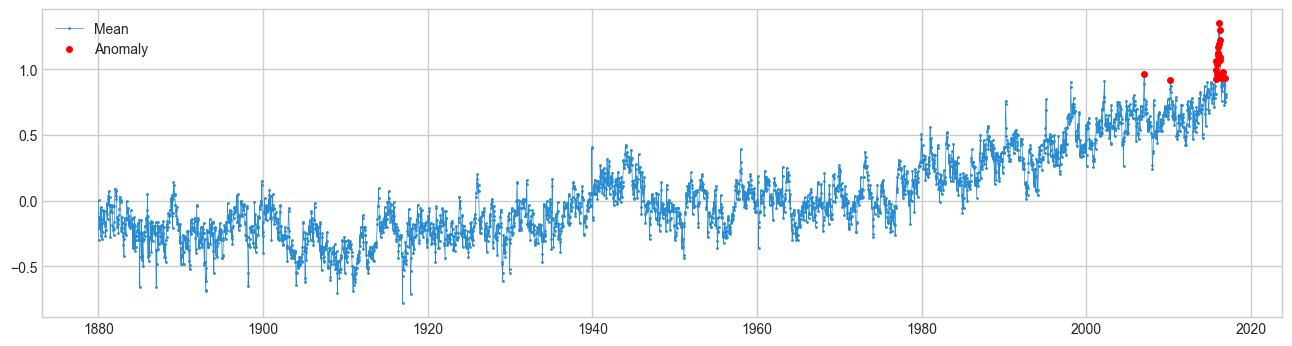

In [29]:
# We can use deviation 

iqr_detector = InterQuartileRangeAD(c=1.5) 
anomalies = iqr_detector.fit_detect(data)

plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

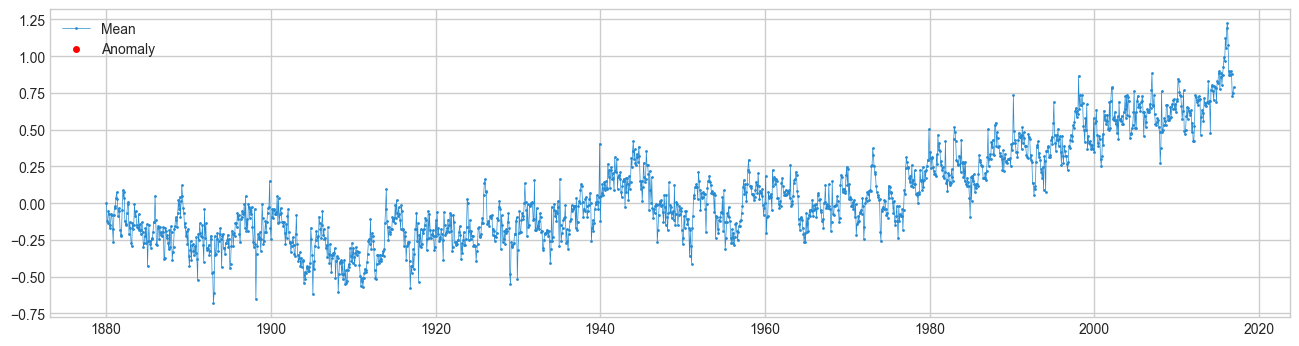

In [30]:
data = validate_series(data)

esd_detector = GeneralizedESDTestAD(alpha=0.3) # assume data is normally distrubeted
anomalies = esd_detector.fit_detect(data)

plot(data, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

### Stock Data

In [40]:
df = yf.download('TSLA')['Close']

df = validate_series(df)

[*********************100%%**********************]  1 of 1 completed


/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

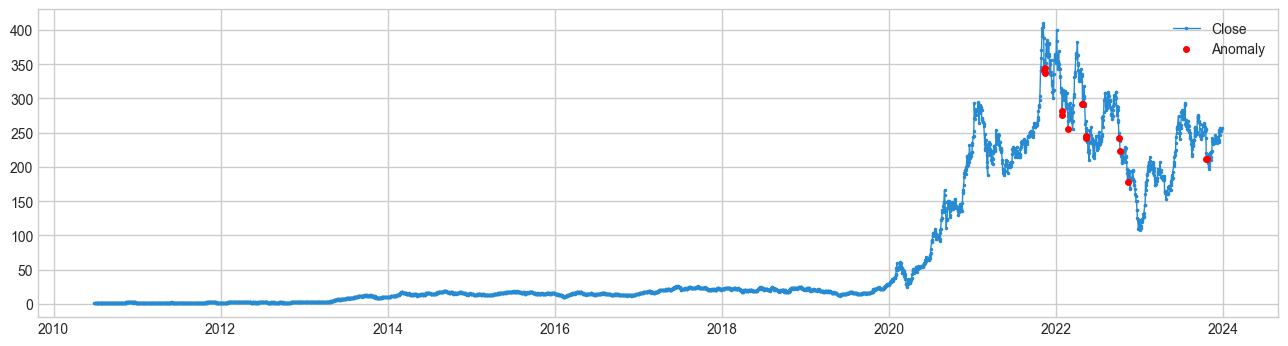

In [53]:
persist_detector = PersistAD(c=15.0, side='negative') # adjust sensivity with c
persist_detector.window = 10
anomalies = persist_detector.fit_detect(df)

plot(df, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag='marker')
plt.show()

Volatility Detector

/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

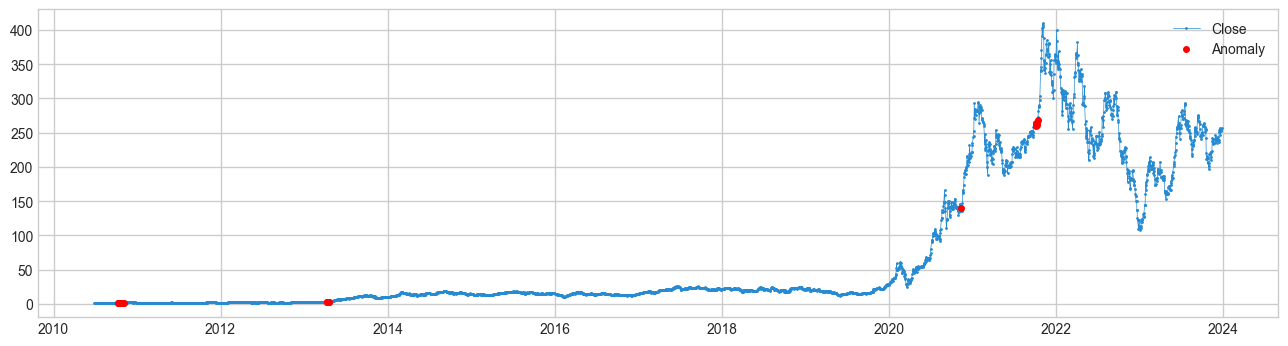

In [57]:
volatiliy_detector = VolatilityShiftAD(c=10.0, side='positive', window=30)
anomalies = volatiliy_detector.fit_detect(df)

plot(df, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

Let's try with different dataset

In [60]:
df_gubre = yf.download('GUBRF.IS', start='2021-06-12', end='2023-12-26', actions=True)['Close']

df_gubre.head()

[*********************100%%**********************]  1 of 1 completed


Date
2021-06-14    59.799999
2021-06-15    58.250000
2021-06-16    57.000000
2021-06-17    55.349998
2021-06-18    53.849998
Name: Close, dtype: float64

In [76]:
df_gubretas  = validate_series(df_gubre)

/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

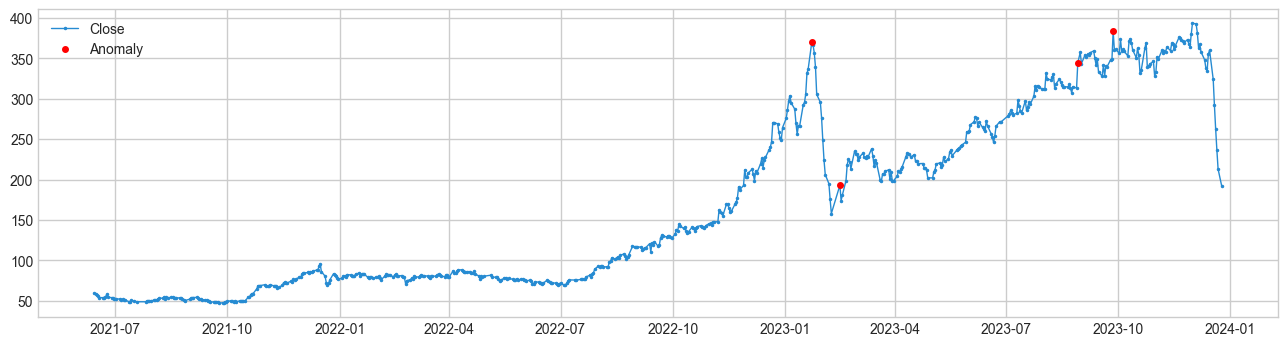

In [85]:
persist_detector = PersistAD(c=5.0, side='positive') # adjust sensivity with c
anomalies = persist_detector.fit_detect(df_gubretas)

plot(df_gubretas, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag='marker')
plt.show()

/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

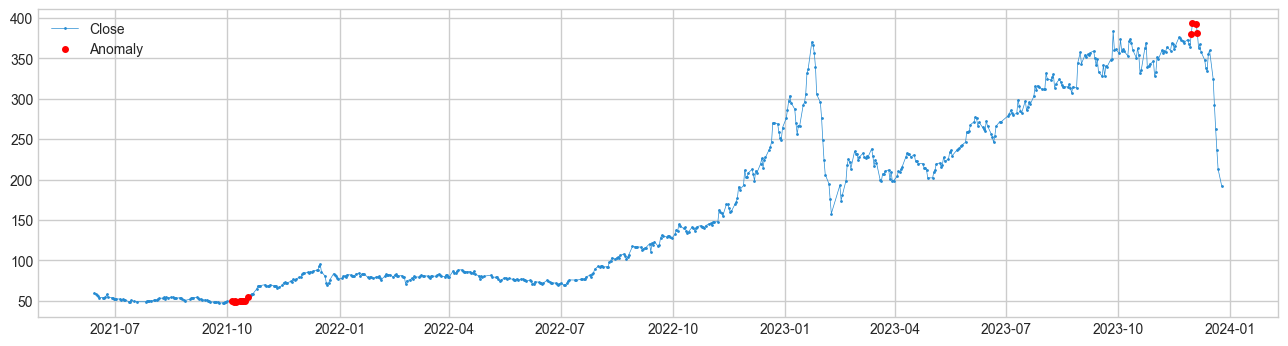

In [100]:
volatiliy_detector = VolatilityShiftAD(c=6.0, side='positive', window=15)
anomalies = volatiliy_detector.fit_detect(df_gubretas)

plot(df_gubretas, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

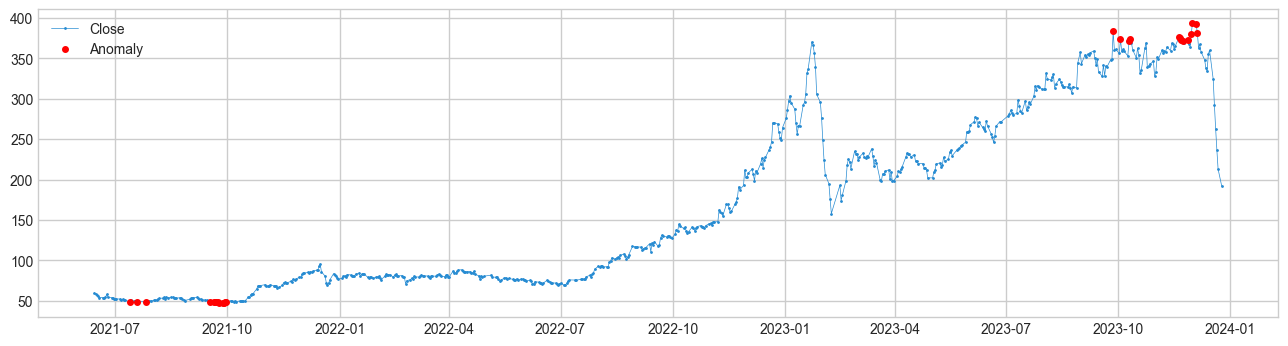

In [116]:
quantile_detector = QuantileAD(low=0.02, high=0.98)
anomalies = quantile_detector.fit_detect(df_gubretas)

plot(df_gubretas, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

In [101]:
df_ereg = yf.download('EREGL.IS', start='2021-06-12', end='2023-12-26', actions=True)['Close']

df_ereg  = validate_series(df_ereg)

[*********************100%%**********************]  1 of 1 completed


/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

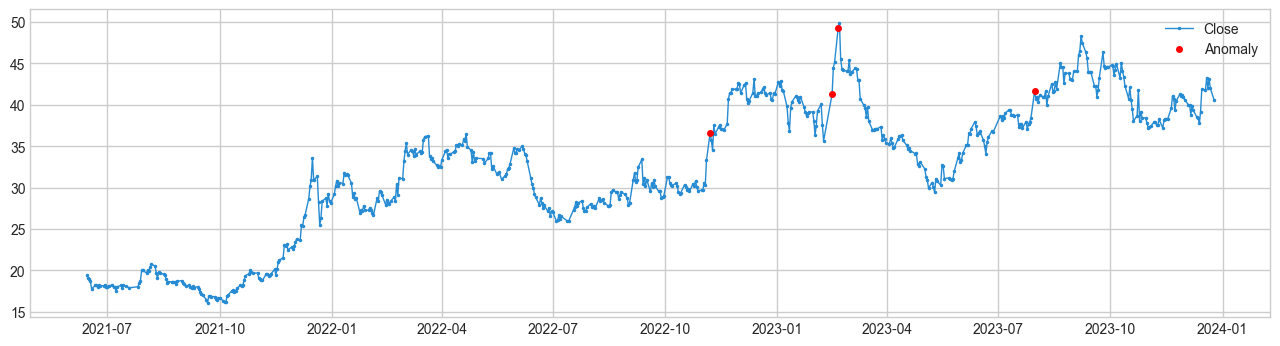

In [106]:
persist_detector = PersistAD(c=3.0, side='positive')
anomalies = persist_detector.fit_detect(df_ereg)

plot(df_ereg, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag='marker')
plt.show()

/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

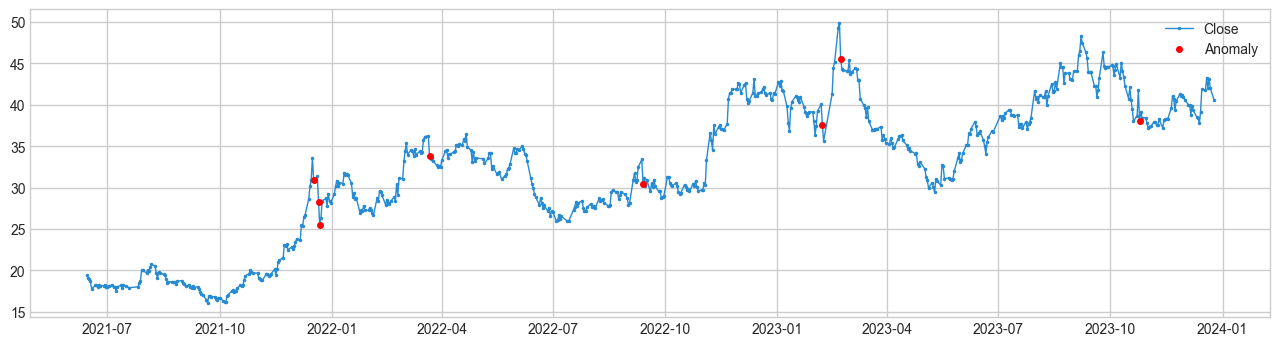

In [108]:
persist_detector = PersistAD(c=2.0, side='negative')
anomalies = persist_detector.fit_detect(df_ereg)

plot(df_ereg, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag='marker')
plt.show()

/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:270: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/detector/_detector_1d.py:141: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  predicted[s.isna()] = np.nan
/Users/burakbedir/Desktop/B/Project-Search-Docs/.venv/lib/python3.11/site-packages/adtk/aggregator/_aggregator.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'nan' has dtype incompatible with bool, please e

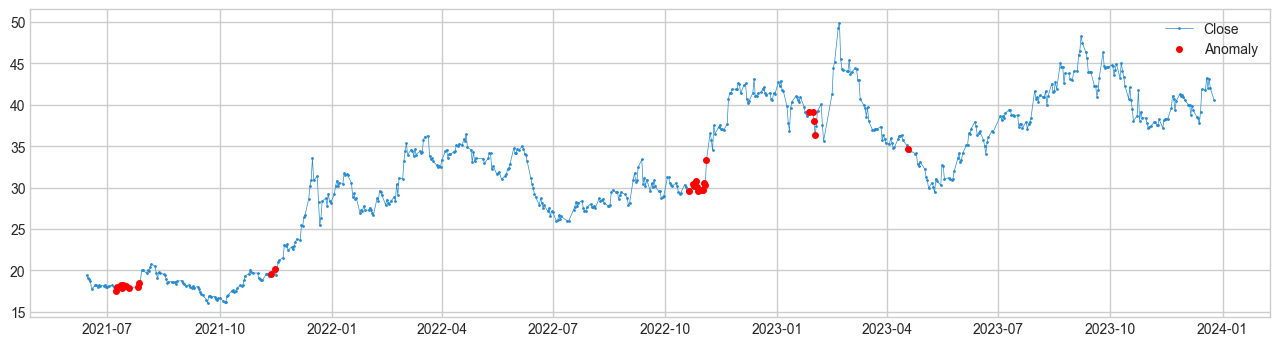

In [114]:
volatiliy_detector = VolatilityShiftAD(c=3.0, side='positive', window=15)
anomalies = volatiliy_detector.fit_detect(df_ereg)

plot(df_ereg, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

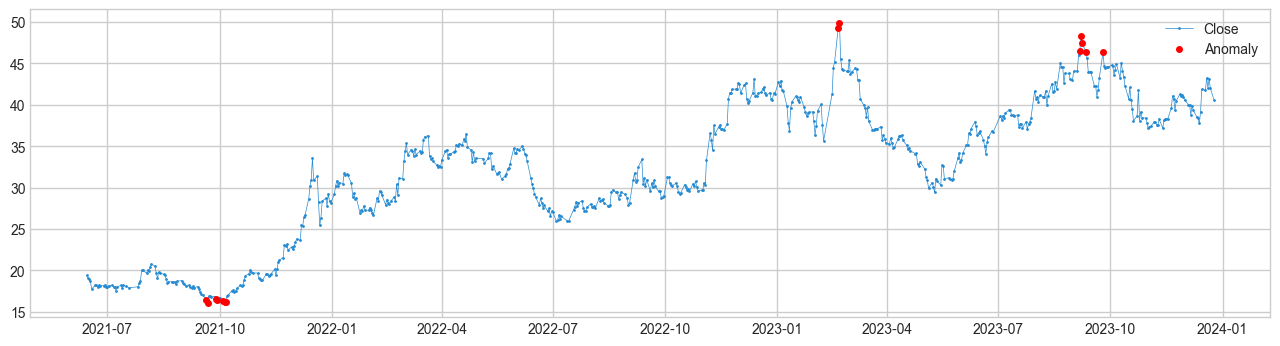

In [119]:
quantile_detector = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_detector.fit_detect(df_ereg)

plot(df_ereg, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()